__COVID19__

Il Dataset è scaricabile dal seguente link: https://github.com/pcm-dpc/COVID-19. 
L' Editore/Autore del dataset è il Dipartimento della Protezione Civile con i dati forniti dal Ministero della Salute.

Nello specifico si vanno ad analizzare i dati dell' Andamento nazionale presenti nella directory dati-andamento-nazionale del dataset.
I campi di ogni record sono i seguenti: 
data, stato,ricoverati_con_sintomi, terapia_intensiva, totale_ospedalizzati, isolamento_domiciliare, totale_attualmente_positivi, nuovi_attualmente_positivi, dimessi_guariti, deceduti, totale_casi, tamponi, note_it, note_en

Utilizzeremo i seguenti campi al fine di analizzare l'andamento nazionale dei casi di Covid19 in cui andremo ad approfondire la correlazione tra i seguenti dati:

-tamponi e totale_casi

-totale_attualmente_positivi e totale_ospedalizzati

-totale_ospedalizzati e terapia_intensiva

-totale_casi e dimessi_guariti

-totale_casi e deceduti


In [1]:
#importiamo le librerie che andremo ad utilizzare
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#fetch dataset.csv  
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)
df

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,29,1128,18661,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,34,1694,21127,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,52,2036,23345,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,79,2502,25856,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,107,3089,29837,NaN,NaN


 Al fine di analizzare la relazione 'totale_casi'  'data' viene rapppresentato in un grafico l'andamento a partire dal 24 Febbraio 2020 sino a data odierna.
 
 La data verrà aggiornata automaticamente con i casi giornalieri alle ore 18:00.
 
 Si può facilmente notare come la curva si possa approssimare ad un andamento esponenziale. 
 Viene rappresentata nella linea rossa i dati reali,  mentre nella linea blu l'andamento esponenzionale.

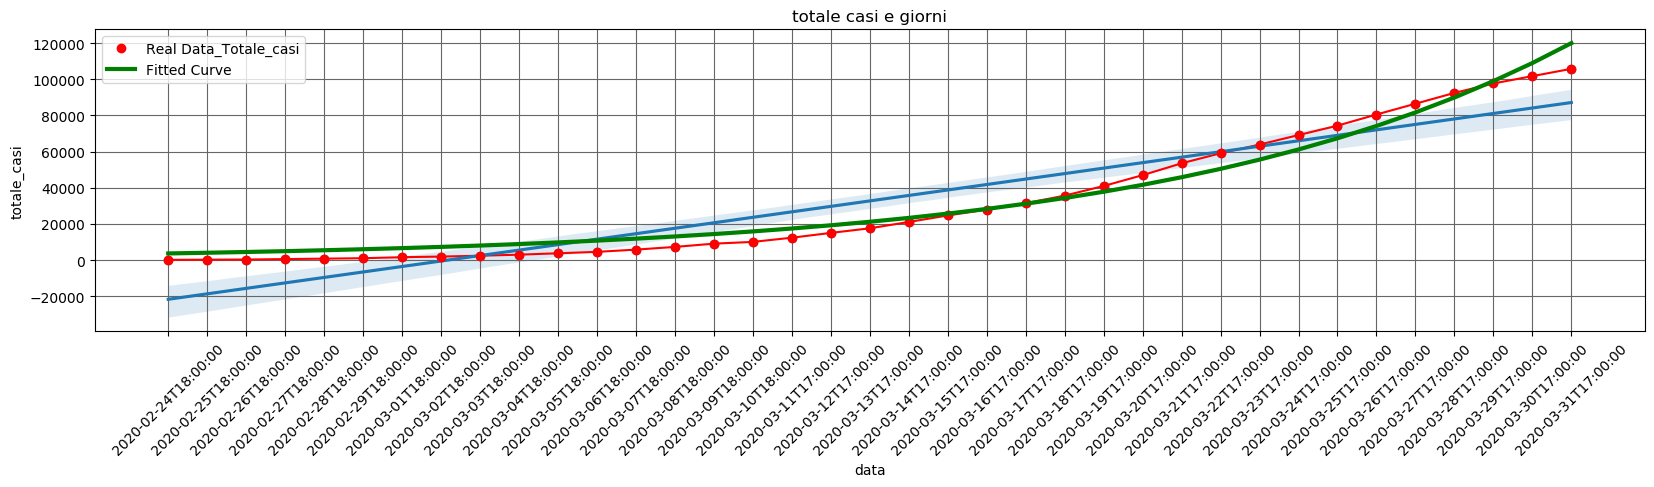

In [3]:
list_data = [str(s)[:10] for s in df.data]

df_casi = df.loc[:,['data','totale_casi']]
plt.figure(figsize=(20, 4), dpi=100)
plt.title("totale casi e giorni")
plt.xticks(rotation=45)
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="data", y="totale_casi", data=df_casi,color="red" )
ax.grid(b=True, which='major', color='#666666', linestyle='-')


a= np.arange(df_casi.shape[0]).astype(dtype=float).reshape(1,-1)
b= df_casi.totale_casi.to_numpy(dtype=float).reshape(1, -1)

reg = LinearRegression()
reg.fit(a, b)

sns.regplot(a, b)


from scipy.optimize import curve_fit

x = np.arange(df_casi.shape[0]).astype(dtype=float)
y = df_casi.totale_casi.to_numpy(dtype=float)

plt.plot(x, y, 'ro', label="Real Data_Totale_casi")

def func(x, a, b):
    return a*np.exp(b*x)

popt, pcov = curve_fit(func, x, y)

plt.plot(x, func(x, *popt), label="Fitted Curve",color='green',lw=3.0) 
plt.legend(loc='upper left')




 valori a e b:  [3769.2951318971986, 0.0961228963632327]


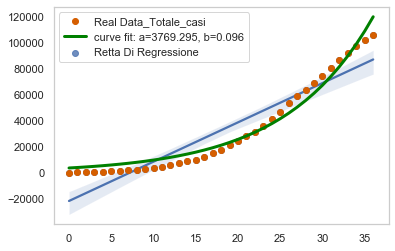

In [19]:
from scipy.optimize import curve_fit
a= np.arange(df_casi.shape[0]).astype(dtype=float).reshape(1,-1)
b= df_casi.totale_casi.to_numpy(dtype=float).reshape(1, -1)
reg = LinearRegression()
reg.fit(a, b)
sns.regplot(a, b, label="Retta Di Regressione")
x = np.arange(df_casi.shape[0]).astype(dtype=float)
y = df_casi.totale_casi.to_numpy(dtype=float)
plt.plot(x, y, 'ro', label="Real Data_Totale_casi")

def func(x, a, b):
    return a*np.exp(b*x)

l=(tuple(popt))
my_list=list(l)
print(' valori a e b: ',my_list)
popt, pcov = curve_fit(func, x, y)

plt.plot(x, func(x, *popt), label='curve fit: a=%5.3f, b=%5.3f'% tuple(popt),color='green',lw=3.0) 
plt.legend(loc='upper left')
plt.grid()
plt.show()

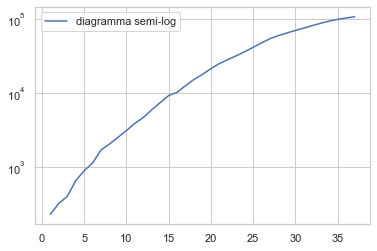

In [44]:
x= np.array(range(1,len(df_casi)+1), dtype='float')
y = df_casi.totale_casi.to_numpy(dtype=int)
plt.semilogy(x,y, label='diagramma semi-log')
plt.legend()
plt.show()


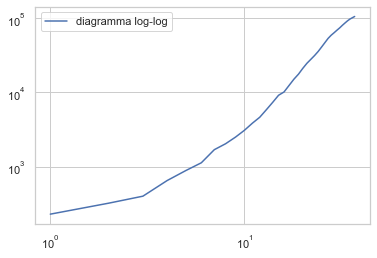

In [42]:
x= np.array(range(1,len(df_casi)+1), dtype='float')
y = df_casi.totale_casi.to_numpy(dtype=int)
plt.loglog(x,y, label='diagramma log-log')
plt.legend()
plt.show()


Tramite la funzione .heatmap() è possibile rappresentare i dati in una forma bidimensionale. 
Alla funzione .heapmap() viene passato df.corr(),che va a misurare la correlazione(coefficiente di Pearson) tra due campi(colonne) del dataset analizzato.
I valori dei dati sono rappresentati come colori nel grafico. 
Sappiamo che il coefficiente di Pearson è compreso nell'intervallo [-1,1].  Noteremo che il valore minimo del coefficiente di correlazione tra due campi sarà 0.86, come visualizzato nella leggenda sulla dx. 
L'obiettivo della funzione .heatmap() è fornire un riepilogo visivo colorato delle informazioni.

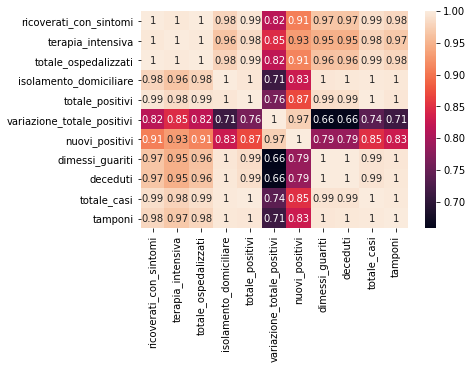

In [5]:
sns.heatmap( df.corr(), annot=True)
plt.show()

__REGRESSIONI LINEARI__

__tamponi e totale_casi__

Analizzeremo qui di seguito le relazioni tra alcuni campi del dataset. 
In particolare di seguito troveremo la relazione tra il numero di tamponi e il numero totale di casi. 
Viene utilizzata la tecnica della Regressione Lineare.
Per prima cosa vengono calcolati il coefficiente angolare m (tramite la funzione .coef()) e l'intercetta q (tramite la funzione .intercept()).

Viene, inoltre, calcolato il Coefficiente di Pearson tramite la funzione .corr()


In [6]:
df_1=df.loc[:,['tamponi', 'totale_casi']]
cf1 = df_1.corr()
X=df.loc[:,['tamponi']]
Y=df.loc[:,['totale_casi']]
reg = LinearRegression()
reg.fit(X, Y)
print()
print("intercetta q:       ",reg.intercept_)
print("coefficiente angolare m: ", reg.coef_, "\n")
print("coefficiente di correlazione: ",  cf1)


intercetta q:        [-2427.34450155]
coefficiente angolare m:  [[0.22512971]] 

coefficiente di correlazione:                tamponi  totale_casi
tamponi      1.000000     0.997971
totale_casi  0.997971     1.000000


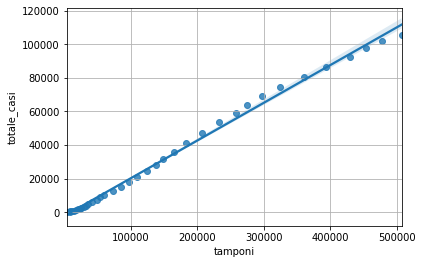

In [7]:
sns.regplot('tamponi','totale_casi',df)
plt.grid()
plt.show()

__totale_positivi e totale_ospedalizzati__

In [8]:
df_2=df.loc[:,['totale_positivi','totale_ospedalizzati']]
cf2= df_2.corr()
Y=df.loc[:,['totale_positivi']]
X=df.loc[:,['totale_ospedalizzati']]
reg = LinearRegression()
reg.fit(X, Y)
print("intercetta q:",reg.intercept_)
print("coefficiente angolare m: ",reg.coef_)
print("\n")
print("coefficiente di correlazione")
print(cf2,"\n")

intercetta q: [-2670.00007161]
coefficiente angolare m:  [[2.28428963]]


coefficiente di correlazione
                      totale_positivi  totale_ospedalizzati
totale_positivi              1.000000              0.992965
totale_ospedalizzati         0.992965              1.000000 



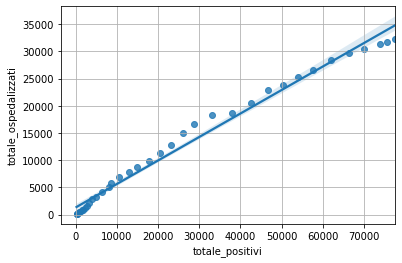

In [9]:
sns.regplot('totale_positivi','totale_ospedalizzati',df)
plt.grid()
plt.show()

__terapia_intensiva e totale_ospedalizzati__

In [10]:
df_3=df.loc[:,['totale_ospedalizzati','terapia_intensiva']]
cf3= df_3.corr()
X=df.loc[:,['totale_ospedalizzati']]
Y=df.loc[:,['terapia_intensiva']]
reg = LinearRegression()
reg.fit(X, Y)
print("intercetta q:",reg.intercept_)
print("coefficiente angolare m: ",reg.coef_)
print("\n")
print("coefficiente di correlazione")
print(cf3,"\n")

intercetta q: [110.34939995]
coefficiente angolare m:  [[0.12595253]]


coefficiente di correlazione
                      totale_ospedalizzati  terapia_intensiva
totale_ospedalizzati              1.000000           0.997804
terapia_intensiva                 0.997804           1.000000 



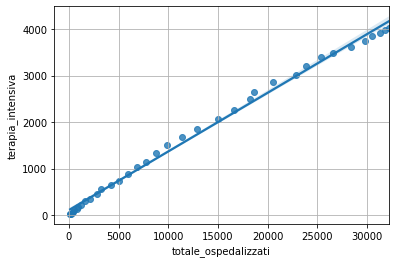

In [11]:
sns.regplot('totale_ospedalizzati','terapia_intensiva',df)
plt.grid()
plt.show()

__totale_casi e dimessi_guariti__

In [12]:
df_4=df.loc[:,['totale_casi', 'dimessi_guariti']]
cf4= df_4.corr()
X=df.loc[:,['totale_casi']]
Y=df.loc[:,['dimessi_guariti']]
reg = LinearRegression()
reg.fit(X, Y)
print("intercetta q:",reg.intercept_)
print("coefficiente angolare m: ",reg.coef_)
print()
print("coefficente di correlazione")
print(cf4,"\n")

intercetta q: [-478.06990609]
coefficiente angolare m:  [[0.13598474]]

coefficente di correlazione
                 totale_casi  dimessi_guariti
totale_casi         1.000000         0.992621
dimessi_guariti     0.992621         1.000000 



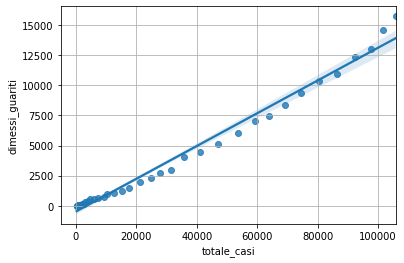

In [13]:
sns.regplot('totale_casi','dimessi_guariti',df)
plt.grid()
plt.show()

__totale_casi e deceduti__

In [14]:
df_5=df.loc[:,['totale_casi', 'deceduti']]
cf5= df_5.corr()
X=df.loc[:,['totale_casi']]
Y=df.loc[:,['deceduti']]
reg = LinearRegression()
reg.fit(X, Y)
print("intercetta q:",reg.intercept_)
print("coefficiente angolare m: ",reg.coef_)
print()
print("coefficiente di correlazione")
print(cf5,"\n")

intercetta q: [-463.62246966]
coefficiente angolare m:  [[0.11028742]]

coefficiente di correlazione
             totale_casi  deceduti
totale_casi     1.000000  0.993251
deceduti        0.993251  1.000000 



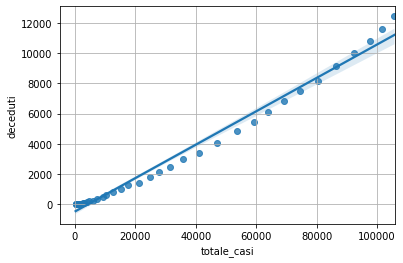

In [15]:
sns.regplot('totale_casi','deceduti',df)
plt.grid()
plt.show()



__ANALISI DI ANDAMENTO REGIONALE__



Visualizzeremo i dati inerenti a __totale_casi__ e __regioni__.

In [16]:
#analizziamo il dataset della regione civile alla directory dati-regioni 
url1= "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200325.csv"
data_frame_regione = pd.read_csv(url1)
data_frame_regione

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,note_it,note_en
0,2020-03-25T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,248,59,307,431,738,116,124,23,52,813,4982,NaN,NaN
1,2020-03-25T17:00:00,ITA,17,Basilicata,40.639471,15.805148,20,14,34,78,112,21,21,0,1,113,857,NaN,NaN
2,2020-03-25T17:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,190,40,230,518,748,49,77,67,43,858,6649,NaN,NaN
3,2020-03-25T17:00:00,ITA,18,Calabria,38.905976,16.594402,93,23,116,217,333,29,32,7,11,351,5058,NaN,NaN
4,2020-03-25T17:00:00,ITA,15,Campania,40.839566,14.250850,318,123,441,631,1072,80,98,53,74,1199,6972,NaN,NaN
5,2020-03-25T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,3180,294,3474,4782,8256,545,800,721,1077,10054,38045,NaN,NaN
6,2020-03-25T17:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,200,52,252,659,911,63,147,158,70,1139,9494,NaN,NaN
7,2020-03-25T17:00:00,ITA,12,Lazio,41.892770,12.483667,805,101,906,769,1675,130,173,131,95,1901,20669,NaN,NaN
8,2020-03-25T17:00:00,ITA,7,Liguria,44.411493,8.932699,927,147,1074,752,1826,134,189,225,254,2305,6602,NaN,NaN
9,2020-03-25T17:00:00,ITA,3,Lombardia,45.466794,9.190347,10026,1236,11262,9329,20591,723,1643,7281,4474,32346,81666,NaN,NaN


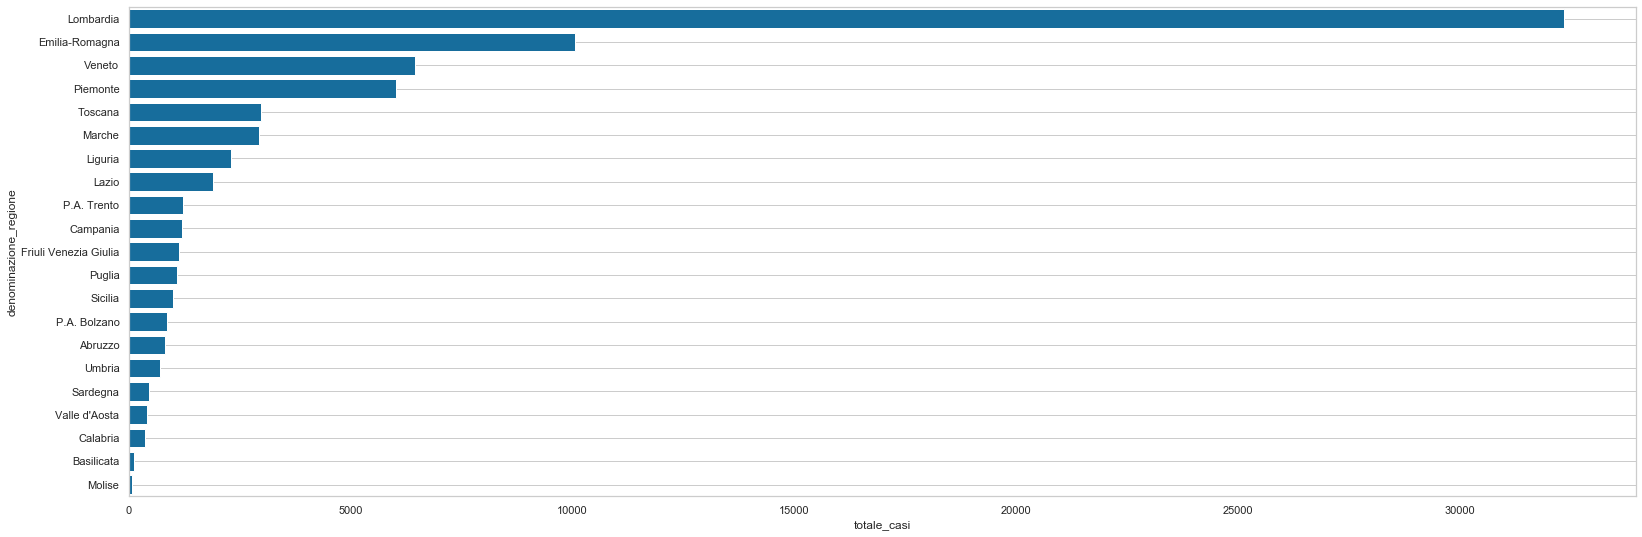

In [17]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(27,9))
tot_casi = data_frame_regione.sort_values('totale_casi',ascending=False)
sns.set_color_codes("colorblind")
sns.barplot( x="totale_casi", y="denominazione_regione", data=tot_casi,label="Total", color="b")

plt.grid()
plt.show()